In [1]:
import city_class_test
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from itertools import chain
from numba import jit,prange,autojit
from time import time

In [2]:
def plot_grid(city):
    cmap = sns.color_palette(["black", "forestgreen", "gold", "navy", "grey"])
    activity_grid = np.array([obj.value for row in city.grid for obj in row]).reshape(city.n,city.n)
    fig = plt.figure(dpi=120)
    sns.heatmap(activity_grid, cmap=cmap)
    plt.show()
#         fig.savefig(\"first_model_t={}.jpg\".format((i+1)*10))

np.random.seed(101)
city = city_class_test.City(n=100, n_init=1)
# plot_grid(city)



In [3]:
city.step()

In [4]:
def run(city):
    for i in range(50):
        for _ in range(10):
            city.step()
#     print(i)
    plot_grid(city)

In [ ]:
%prun run(city)

501


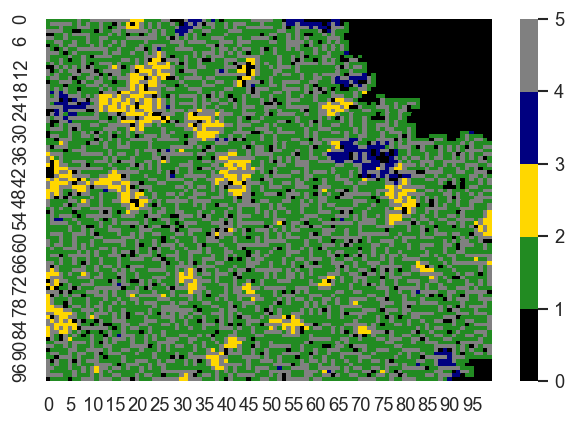

In [12]:
print(city.t)
plot_grid(city)

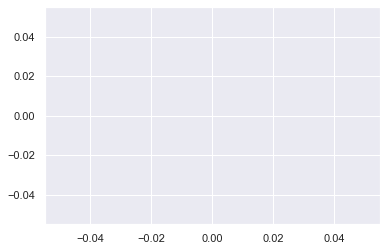

In [9]:
for activity in city.activities:
    plt.plot(activity)

In [7]:
@jit(nopython=True)
def jitit2(activity_grid, candidates, value=0, new_candidates = np.array([])):
    for i in range(candidates.shape[0]):
        candidate = candidates[i]
        if activity_grid[candidate[0],candidate[1]] == 0:
            new_candidates = np.append(new_candidates, candidate)
    return new_candidates
al = [act for act in city.all_activities if act.type == 'init']

In [15]:
@jit(nopython=True)
def calc_grow_prob(candidate_pos, act_pos, dist_decay):
    return np.exp(-dist_decay*euclidean_dist(act_pos, candidate_pos))

@jit(nopython=True)
def euclidean_dist(pos1, pos2):
    return np.sqrt(np.sum((pos1-pos2)**2))

@jit(nopython=True, parallel=True)
def jitit2(candidates, act_pos, dist_decay, N, probs):    
    for i in prange(N):
        candidate_pos = candidates[i]
        probs[i] += calc_grow_prob(candidate_pos, act_pos, dist_decay)
    return probs

N  = np.array(al[0].field_neighbors).shape[0]
probs = np.zeros(N)
jitit2(np.array(al[0].field_neighbors), np.array(al[0].pos), 0.8, N, probs)

array([0.10406478, 0.16715155, 0.20189652, 0.16715155, 0.10406478,
       0.16715155, 0.32259073, 0.44932896, 0.32259073, 0.16715155,
       0.20189652, 0.44932896, 0.44932896, 0.20189652, 0.16715155,
       0.32259073, 0.44932896, 0.32259073, 0.16715155, 0.10406478,
       0.16715155, 0.20189652, 0.16715155, 0.10406478])

In [13]:
if 1:
    print(1)

1


In [9]:
np.sum([[],[],[]])

0.0

In [9]:
if 0.0:
    print('ja')
    